In [1]:
import pandas as pd

churn_data = pd.read_csv('../data/churn.csv')
churn_data.drop(['RowNumber'], axis=1)
churn_data.head()

FileNotFoundError: [Errno 2] No such file or directory: '../data/churn.csv'

* RowNumber — номер строки таблицы (удалён)
* CustomerId — идентификатор клиента
* Surname — фамилия клиента
* CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
* Geography — страна клиента (банк международный)
* Gender — пол клиента
* Age — возраст клиента
* Tenure — сколько лет клиент пользуется услугами банка
* Balance — баланс на счетах клиента в банке
* NumOfProducts — количество услуг банка, которые приобрёл клиент
* HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
* IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
* EstimatedSalary — предполагаемая заработная плата клиента
* Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

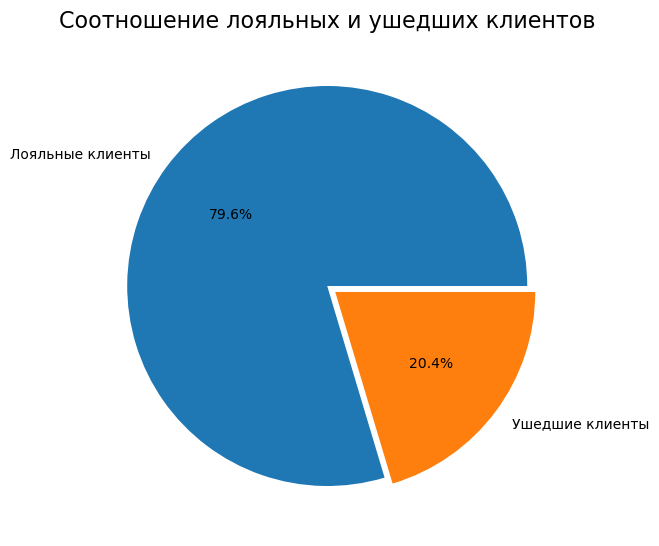

In [ ]:
import matplotlib.pyplot as plt

exited_data = churn_data['Exited'].value_counts()
#display(exited_data)

fig = plt.figure(figsize=(5,5))
axes = fig.add_axes([0,0,1,1])
axes.pie(
    exited_data,    
    labels=['Лояльные клиенты', 'Ушедшие клиенты'],
    autopct='%.1f%%',
    explode = [0, 0.05]
    
);
axes.set_title('Соотношение лояльных и ушедших клиентов', fontsize=16);

Количество лояльных клиентов больше количества ушедших и составляет, в процентном соотношении, 79.6% и 20.4% соответственно.

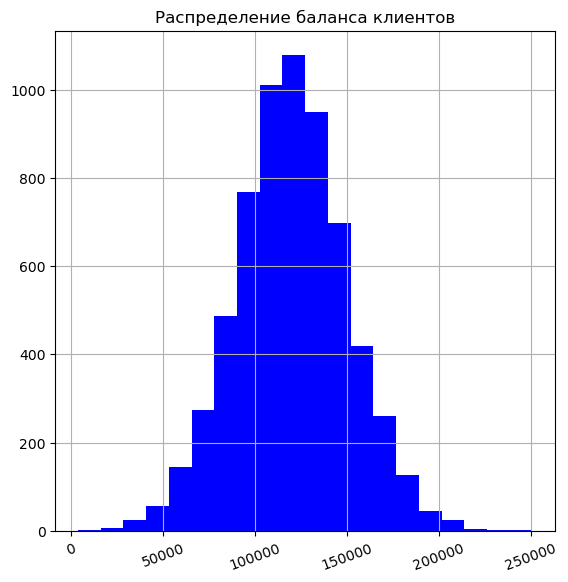

In [ ]:
mask = churn_data['Balance'] > 2500
balance_data = churn_data[mask]['Balance']

fig = plt.figure(figsize=(5,5))
axes = fig.add_axes([0,0,1,1])
axes.hist(
    x=balance_data, 
    label=["Баланс"], 
    color="blue", 
    bins=20
)
axes.set_title("Распределение баланса клиентов");
axes.xaxis.set_tick_params(rotation=20);
axes.grid();


Распределение баланса клиентов похоже на нормальное.
Наибольшее количество клиентов имеет на своём счету сумму, попадающую в диапазон от 120 до 130 тысяч долларов.

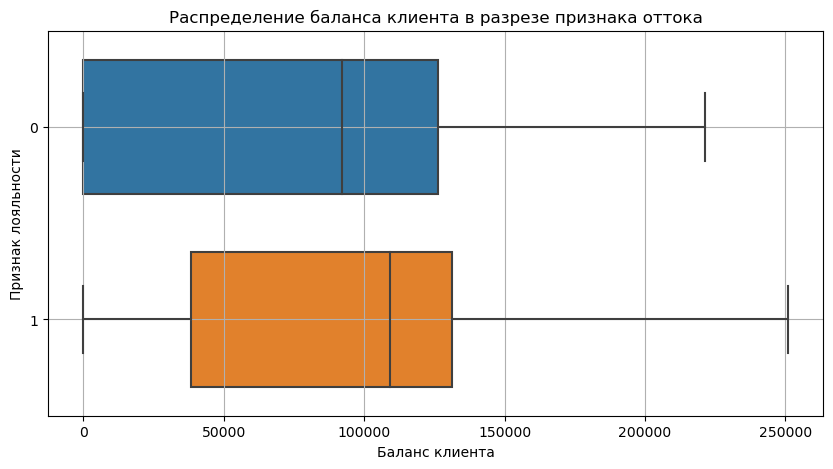

In [ ]:
import seaborn as sns

fig = plt.figure(figsize=(10, 5))
boxplot = sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Balance',
    orient='h',
    width=0.7
)
boxplot.set_title('Распределение баланса клиента в разрезе признака оттока');
boxplot.set_xlabel('Баланс клиента');
boxplot.set_ylabel('Признак лояльности');
boxplot.grid()

* Суммы на накопительных счетах лояльных клиентов (признак - 0) имеют меньший разброс по сравнению с разбросом сумм на счетах нелояльных клиентов (признак - 1) 
* Медианное значение баланса больше у нелояльных пользователей. 
* Можно предположить, что нелояльные пользователи недовольны процентной ставкой на текущем счёте или используют данный счет (для хранения больших сумм) как временный, - для проведения финансовых операций, с последующим его закрытием.
* Мы видим большое смещение лояльных клиентов к нулю, это вызвано большим количеством клиентов с нулевым балансом. Стоит рассмотреть таких клиентов отдельно. 

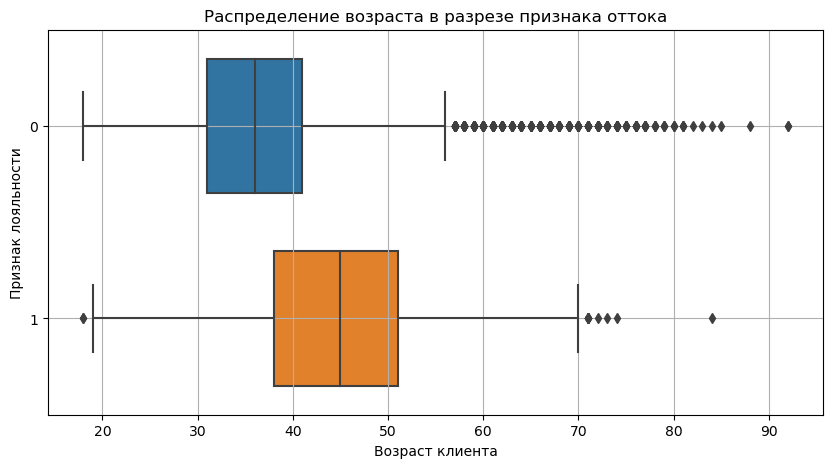

In [ ]:
fig = plt.figure(figsize=(10, 5))
boxplot = sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Age',
    orient='h',
    width=0.7
)
boxplot.set_title('Распределение возраста в разрезе признака оттока');
boxplot.set_xlabel('Возраст клиента');
boxplot.set_ylabel('Признак лояльности');
boxplot.grid()

В группе лояльных клиентов больше потенциальных выбросов, чем в группе нелояльных. Но, возможно, эти выбросы говорят о некотором количестве клиентов пенсионного возраста.
Банку стоит обратить внимание на клиентов возрастной группы в диапазоне 31-41 год, т.к. это наиболее многочисленная группа лояльных клиентов.

In [ ]:
import plotly.express as px
fig = px.scatter(
    data_frame=churn_data,
    x = 'EstimatedSalary', # з/п
    y = 'CreditScore',   
    color='Exited',     
    width=1000,
    height=700,
    title='Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты'
)
fig.show(renderer='png', scale=None)


Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты не просматривается, однако только у ушедших клиентов мы видим рейтинг меньше 400.

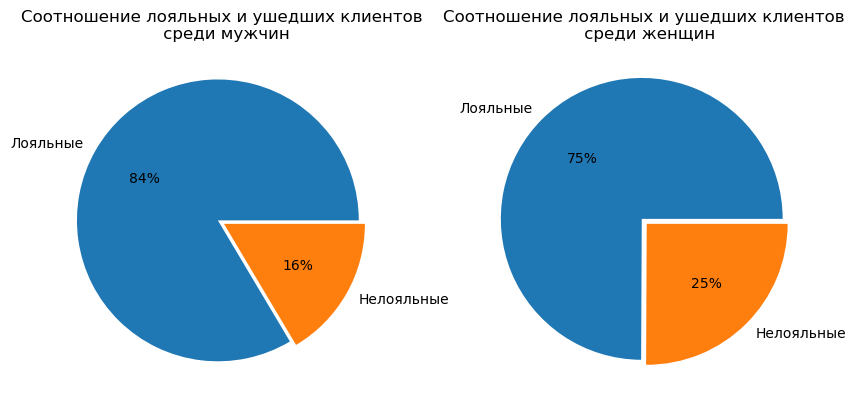

In [ ]:
mask_m=churn_data['Gender']=='Male'
mask_f=churn_data['Gender']=='Female'

lost_m = churn_data[mask_m]['Exited'].value_counts()
lost_f = churn_data[mask_f]['Exited'].value_counts()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))

axes[0].pie(
    lost_m,
    labels=['Лояльные', 'Нелояльные'],
    autopct='%.0f%%',
    explode = [0.05, 0]
);
axes[0].set_title('Соотношение лояльных и ушедших клиентов \n среди мужчин', fontsize=12);

axes[1].pie(
    lost_f,
    labels=['Лояльные', 'Нелояльные'],
    autopct='%.0f%%',
    explode = [0.05, 0]
);
axes[1].set_title('Соотношение лояльных и ушедших клиентов \n среди женщин', fontsize=12);

Среди женщин количество нелояльных клиентов выше, чем среди мужчин. И составляет 25% и 16% соответственно.

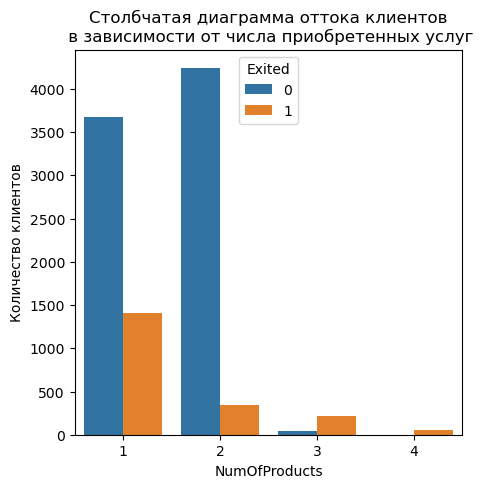

In [ ]:
def index0(x):
    return x[0]
def index1(x):
    return x[1]

table = churn_data.groupby(['NumOfProducts','Exited'])['CustomerId'].count() 
table = table.to_frame() # Преопразуем из Series в DataFrame с мультииндексом
table['tmp'] = table.index # Отдельный столбец, представляющий значения мультииндекса
table['NumOfProducts'] = table['tmp'].apply(index0)
table['Exited'] = table['tmp'].apply(index1)
#display(table, table.shape,table.index)

fig = plt.figure(figsize=(5, 5))
barplot = sns.barplot(
    data=table,
    x='NumOfProducts',
    y='CustomerId',
    hue='Exited',
)
barplot.set_title('Столбчатая диаграмма оттока клиентов\n в зависимости от числа приобретенных услуг');
barplot.set_ylabel('Количество клиентов');

Наибольшая доля оттока наблюдается среди тех клиентов банка, которые воспользовались 3-4 услугами.

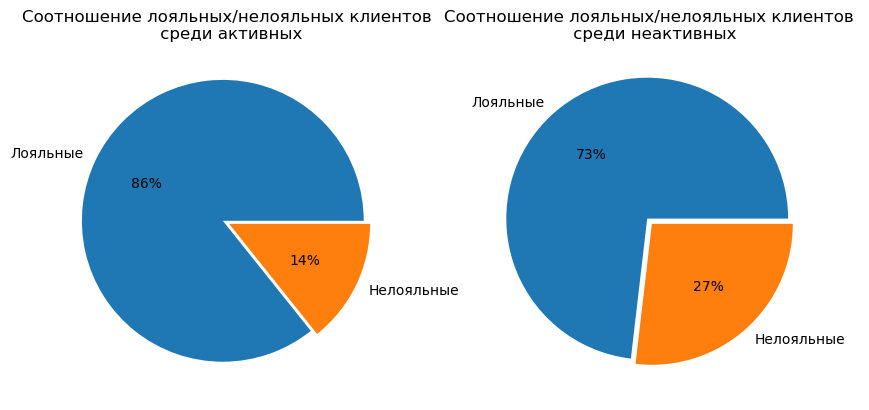

In [ ]:
active = churn_data[churn_data['IsActiveMember']==1]['Exited'].value_counts()
no_active = churn_data[churn_data['IsActiveMember']==0]['Exited'].value_counts()
#display(churn_data[churn_data['IsActiveMember']==1]['Exited'].value_counts())
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))

axes[0].pie(
    active,
    labels=['Лояльные', 'Нелояльные'],
    autopct='%.0f%%',
    explode = [0.05, 0]
);
axes[0].set_title('Соотношение лояльных/нелояльных клиентов \n среди активных', fontsize=12);

axes[1].pie(
    no_active,
    labels=['Лояльные', 'Нелояльные'],
    autopct='%.0f%%',
    explode = [0.05, 0]
);
axes[1].set_title('Соотношение лояльных/нелояльных клиентов \n среди неактивных', fontsize=12);

* Среди активных клиентов банка отток клиентов составляет 14% от общего числа активных клиентов. Среди неактивных клиентов этот показатель больше и составляет 27%.
* Банку следует повышать активность клиентов, предлагая им новые услуги на выгодных условиях.

In [ ]:
#import plotly
import plotly.express as px

data = churn_data.groupby("Geography")['Exited'].mean()
data = data.to_frame() # Преопразуем из Series в DataFrame с мультииндексом
data['Geography'] = data.index
#display(data)

fig = px.choropleth(
    data_frame=data, 
    locations="Geography", #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="Exited", #от чего зависит цвет    
    range_color=[0, 0.35], #диапазон цвета
    title='Доля ушедших клиентов по странам мира',
    width=800, 
    height=500, 
    color_continuous_scale='Reds' #палитра цветов
)

fig.show(renderer='png', scale=None)

Наибольшая доля ушедших клиентов наблюдается в Германии. Возможно, это связано с большим количеством клиентов-женщин из этой страны, и как следствие, наибольшей долей нелояльных клиентов.

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,0.275000,0.208333,0.137255,0.168317,0.131868,0.233333,0.241379,0.127660,0.196078,0.270833,0.254902
Fair,0.217391,0.215596,0.213043,0.216450,0.197248,0.206897,0.236364,0.171103,0.209016,0.190045,0.205357
Good,0.203822,0.203608,0.187342,0.205962,0.195122,0.214470,0.182857,0.191892,0.152355,0.194667,0.197802
Poor,0.226415,0.259398,0.211765,0.212245,0.233202,0.199153,0.179916,0.151261,0.214575,0.251082,0.169492
Very_Poor,0.444444,0.253731,0.151515,0.285714,0.293103,0.149254,0.225352,0.206349,0.253521,0.229508,0.333333


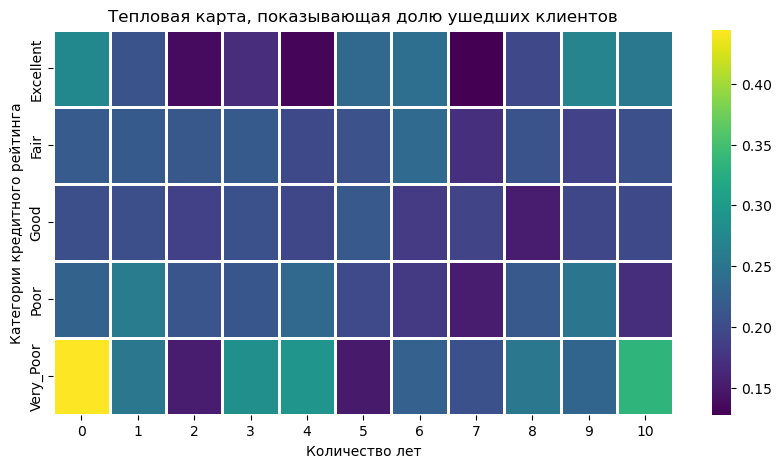

In [ ]:

def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor" # Низкий
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent" # Выдающийся
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

table = churn_data.groupby(['CreditScoreCat', 'Tenure'])['Exited'].mean().unstack()
display(table)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
jb_heatmap = sns.heatmap(
    table,
    linewidth=1,
    linecolor='w',
    cmap='viridis',
    ax = axes
)
jb_heatmap.set_title('Тепловая карта, показывающая долю ушедших клиентов');
jb_heatmap.set_xlabel('Количество лет');
jb_heatmap.set_ylabel('Катeгории кредитного рейтинга');

Согласно тепловий карте, наибольшая доля ушедших клиентов относится к категории клиентов с очень низким рейтингом (very_poor), которые пользовались услугами банка менее 1 года.
Так же, можно отметить, что значительная доля нелояльных клиентов - это клиенты с низким рейтингом, пользующиеся услугами банка 3-4 года и 10 лет. 